# Assignment 2 by: Bharath Narayanan Venkatesh (s4033348)


# Task 1: Data Preparation and Analysis


## Task 1.1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
wine_data = pd.read_csv('A2data.csv', delimiter=';')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [4]:
duplicate_count = wine_data.duplicated().sum()
print("Duplicate rows:", duplicate_count)

Duplicate rows: 906


In [5]:
wine_data = wine_data.drop_duplicates()

In [6]:
data_types = wine_data.dtypes
data_types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_data['residual sugar'] = pd.to_numeric(wine_data['residual sugar'],errors = 'coerce')
wine_data['free sulfur dioxide'] = pd.to_numeric(wine_data['free sulfur dioxide'],errors = 'coerce')
wine_data['total sulfur dioxide'] = pd.to_numeric(wine_data['total sulfur dioxide'],errors = 'coerce')
wine_data['density'] = pd.to_numeric(wine_data['density'],errors = 'coerce')

In [8]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
missing_values = wine_data.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        1
citric acid             5
residual sugar          7
chlorides               1
free sulfur dioxide     3
total sulfur dioxide    4
density                 7
pH                      1
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [10]:
data_cleaned = wine_data.dropna()

In [11]:
missing_values = data_cleaned.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
from scipy import stats

z_scores = np.abs(stats.zscore(data_cleaned))
outliers = (z_scores > 3).any(axis=1)
data_cleaned = data_cleaned[~outliers]

In [13]:
data_cleaned.reset_index(drop=True, inplace=True)

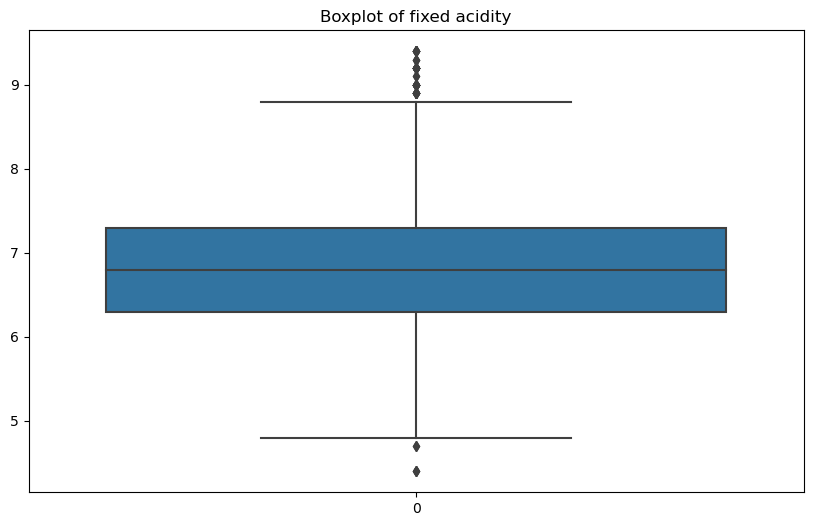

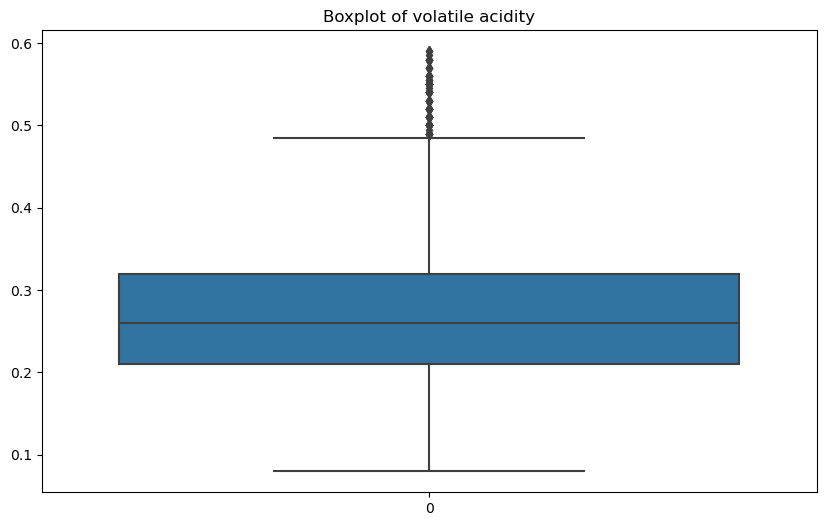

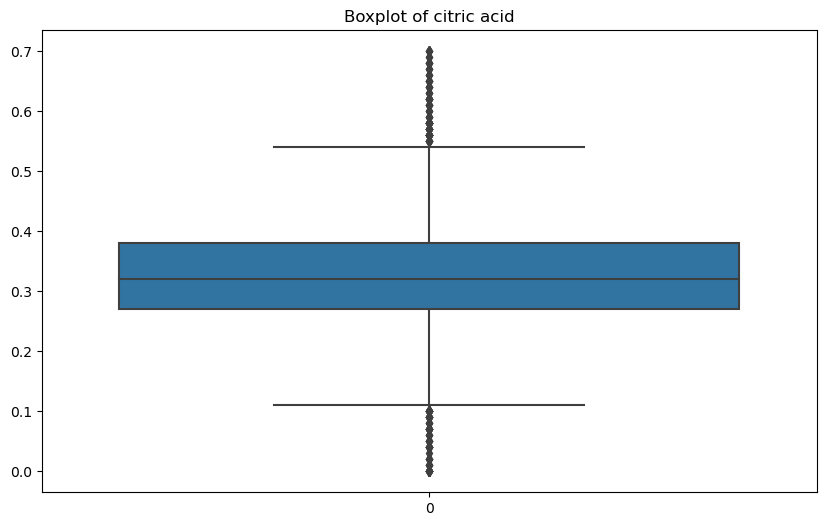

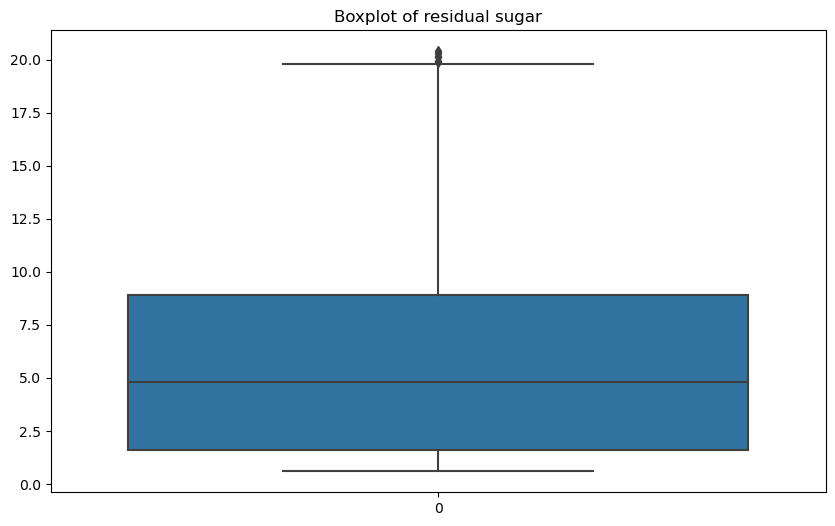

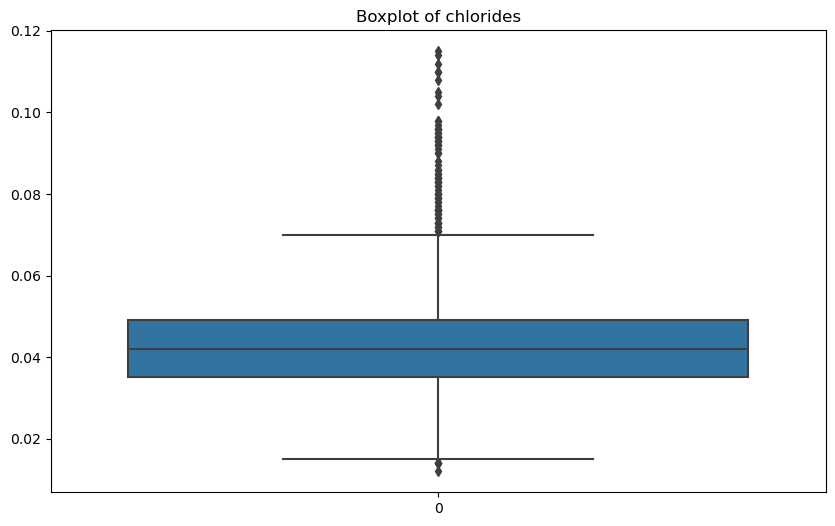

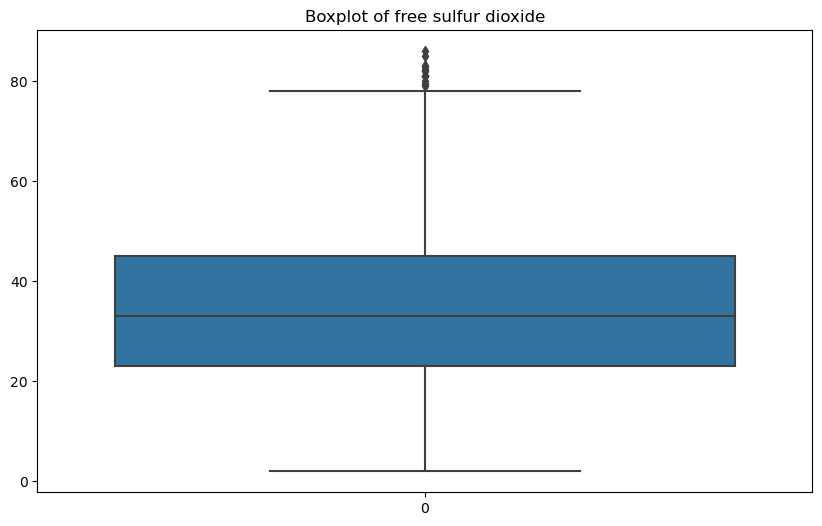

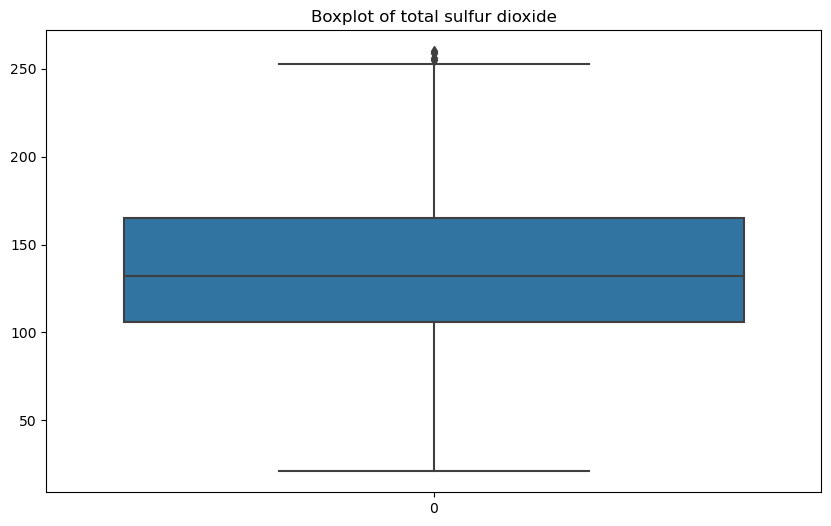

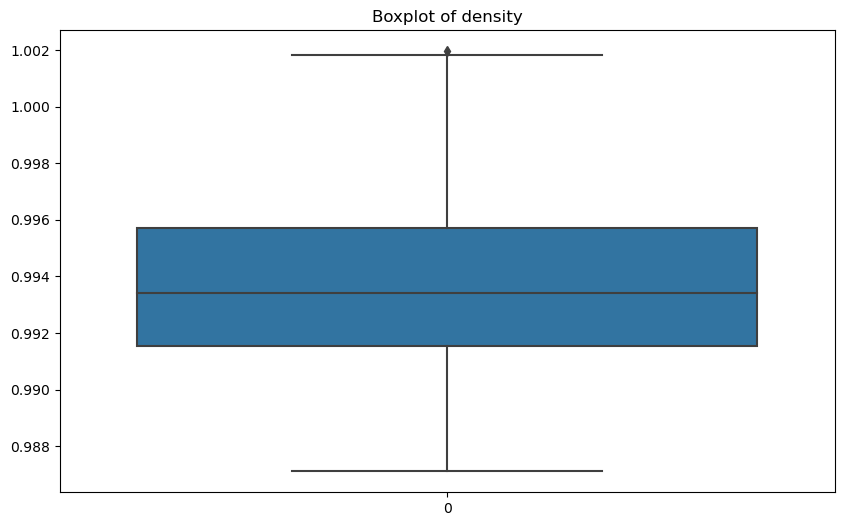

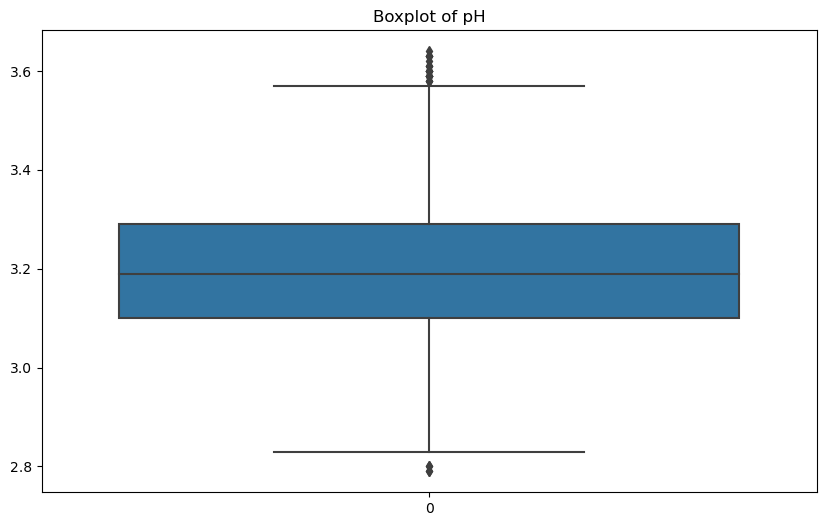

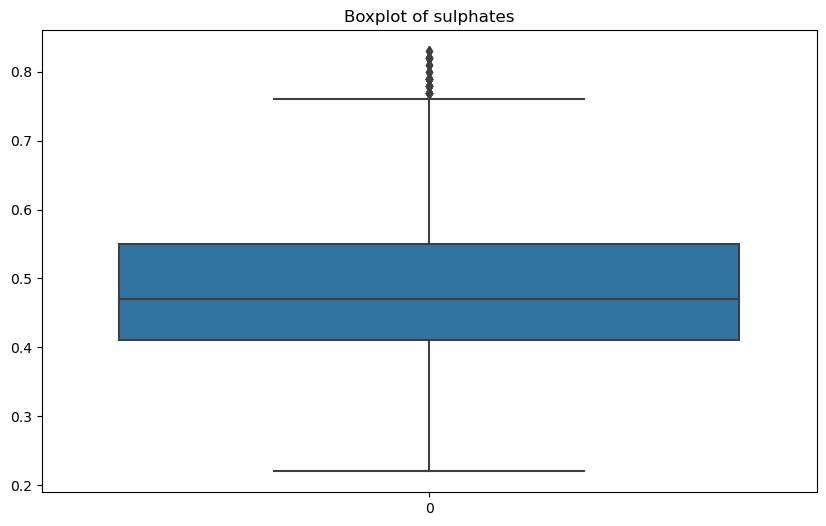

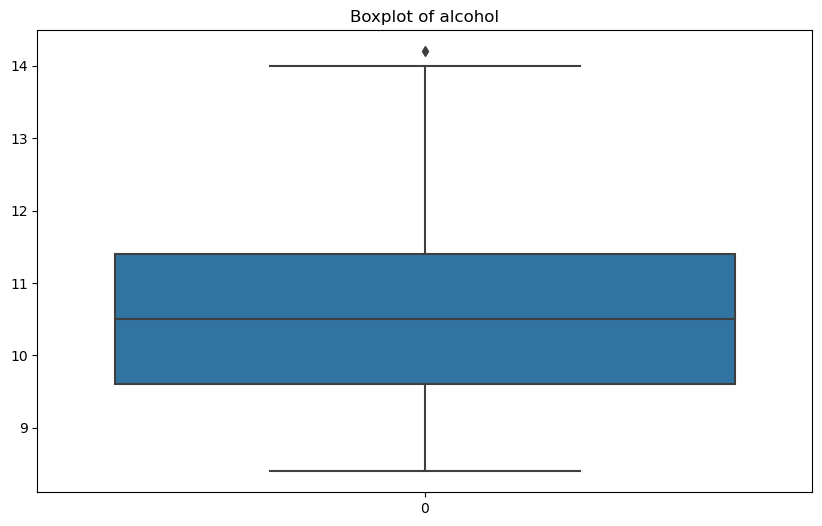

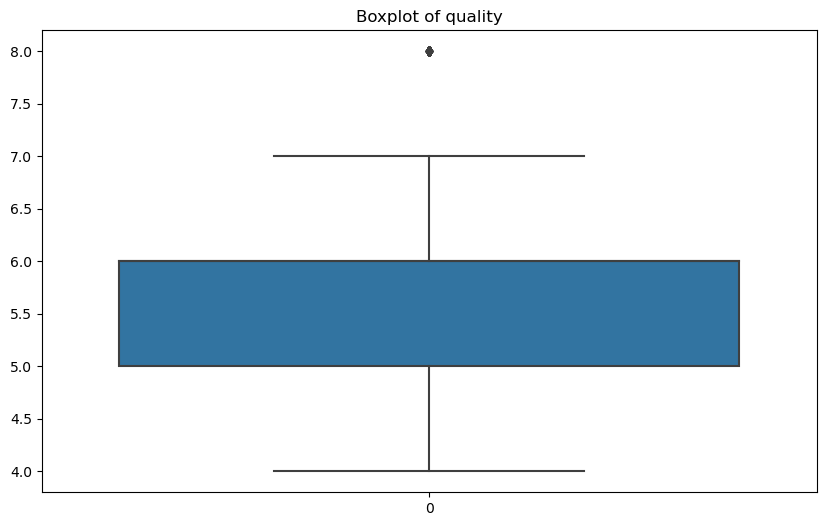

In [14]:
for col in data_cleaned.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [15]:
random_sample = data_cleaned.sample(n=600, random_state=44)

In [19]:
random_sample.to_csv('A2RandomSample.csv', index=False)

In [20]:
sample = pd.read_csv('A2RandomSample.csv')

In [21]:
sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.27,0.51,7.6,0.049,35.0,200.0,0.99548,3.16,0.54,9.4,4
1,7.3,0.32,0.25,7.2,0.056,47.0,180.0,0.99610,3.08,0.47,8.8,5
2,7.9,0.19,0.26,2.1,0.039,8.0,143.0,0.99420,3.05,0.74,9.8,5
3,6.8,0.25,0.24,1.6,0.045,39.0,164.0,0.99402,3.53,0.58,10.8,5
4,6.3,0.20,0.26,1.6,0.027,36.0,141.0,0.99268,3.53,0.56,10.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
595,7.7,0.31,0.36,4.3,0.026,15.0,87.0,0.99152,3.11,0.48,12.0,5
596,6.9,0.29,0.23,8.6,0.056,56.0,215.0,0.99670,3.17,0.44,8.8,5
597,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,5
598,8.6,0.18,0.40,1.1,0.040,20.0,107.0,0.99230,2.94,0.32,10.2,7


In [22]:
sample.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
4.4            0.32              0.39         4.30            0.030      31.0                 127.0                 0.98904  3.46  0.36       12.8     8          1
7.1            0.45              0.24         2.70            0.040      24.0                 87.0                  0.98862  2.94  0.38       13.4     8          1
7.2            0.14              0.35         1.20            0.036      15.0                 73.0                  0.99380  3.46  0.39       9.9      5          1
               0.15              0.38         1.20            0.038      18.0                 110.0                 0.99170  3.19  0.43       11.1     6          1
               0.17              0.41         1.60            0.052      24.0                 126.0                 0.99228  3.19  0.49       10.8     5          1
                     

## Task 1.2


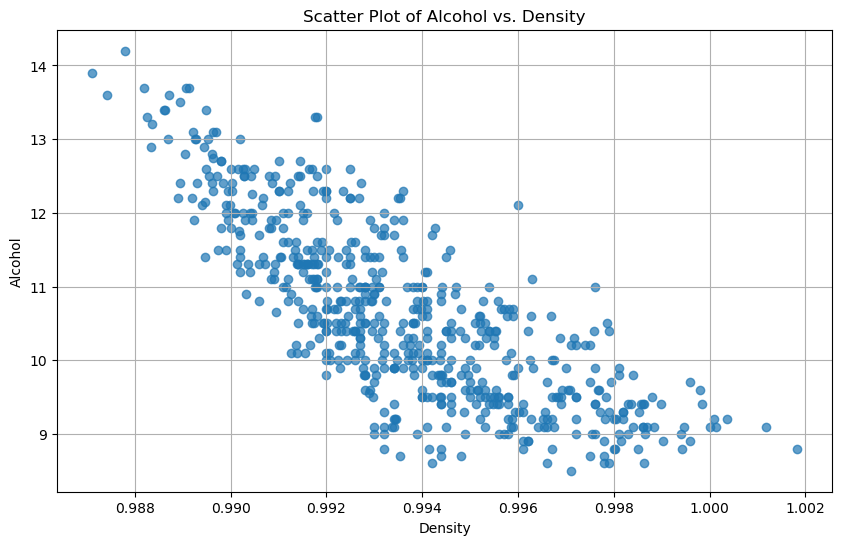

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(sample['density'], sample['alcohol'], alpha=0.7)
plt.title('Scatter Plot of Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.grid(True)
plt.show()

In [24]:
X_data = sample[['density']]
y_data = sample['alcohol']

In [25]:
from sklearn.linear_model import LinearRegression
# Building the linear regression model
model_cleaned = LinearRegression().fit(X_data, y_data)
# Displaying the coefficients
intercept = model_cleaned.intercept_
slope = model_cleaned.coef_[0]
intercept, slope

(362.6420873797737, -354.28818655883254)

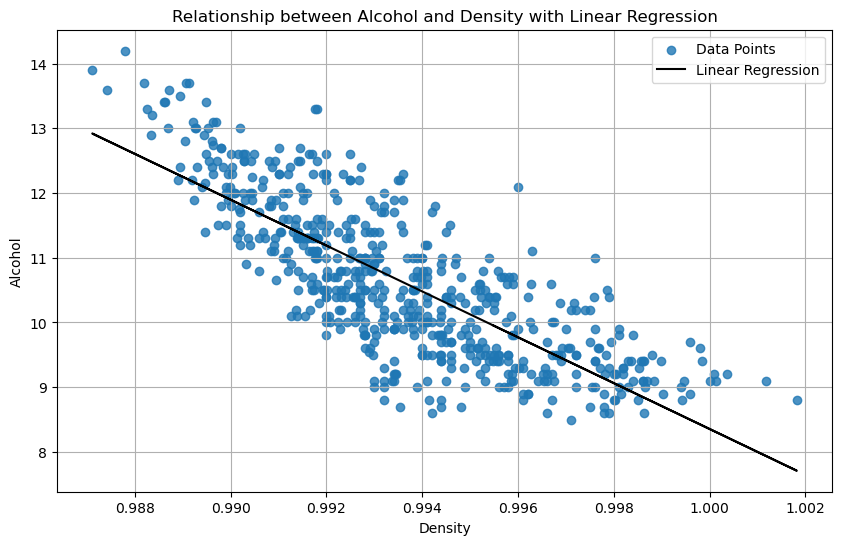

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(sample['density'], sample['alcohol'], alpha=0.8, label='Data Points')
plt.plot(sample['density'], intercept + slope * sample['density'], color='black', label='Linear Regression')
plt.title('Relationship between Alcohol and Density with Linear Regression')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend()
plt.grid(True)
plt.show()

## Task 1.3


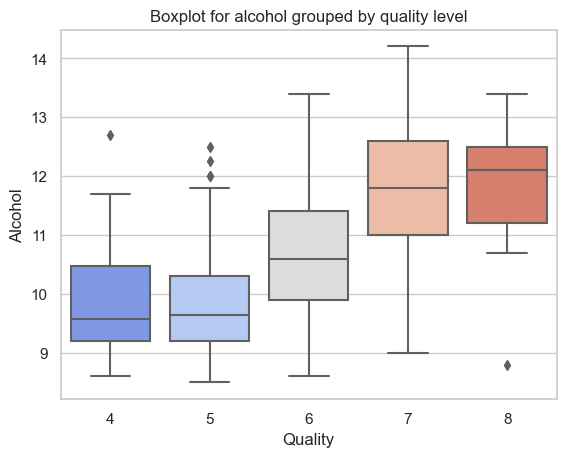

In [27]:
sns.set(style="whitegrid")  # Set the grid style
sns.boxplot(x=sample['quality'], y=sample['alcohol'], palette='coolwarm')
plt.title('Boxplot for alcohol grouped by quality level')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# Task 2: Classification

## Task 2.1 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

sample = pd.read_csv('A2RandomSample.csv')

# Separate the features and the target variable
X = sample.drop('quality', axis=1)
y = sample['quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=44)

# Train a k-NN classifier with default k=5
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

# Predict the labels for the test set and evaluate the classifier
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusionmatrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [29]:
formatted_accuracy = "{:.4f}".format(accuracy)
print("accuracy = {}".format(formatted_accuracy))
formatted_precision = "{:.4f}".format(precision)
print("precision = {}".format(formatted_precision))
formatted_recall = "{:.4f}".format(recall)
print("recall = {}".format(formatted_recall))
print("confusion matrix:")
print(confusionmatrix)
print(classification_report(y_test, y_pred))

accuracy = 0.5056
precision = 0.4714
recall = 0.5056
confusion matrix:
[[ 0  6  2  0  0]
 [ 0 26 13  2  0]
 [ 1 25 56  6  1]
 [ 0  5 21  9  0]
 [ 0  0  4  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.42      0.63      0.50        41
           6       0.58      0.63      0.61        89
           7       0.45      0.26      0.33        35
           8       0.00      0.00      0.00         7

    accuracy                           0.51       180
   macro avg       0.29      0.30      0.29       180
weighted avg       0.47      0.51      0.48       180



## Task 2.2 

In [30]:
k_range = range(1, 51)
accuracy = []

for j in k_range:
    KNN = KNeighborsClassifier(n_neighbors=j)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Best k value
best_k = k_range[accuracy.index(max(accuracy))]


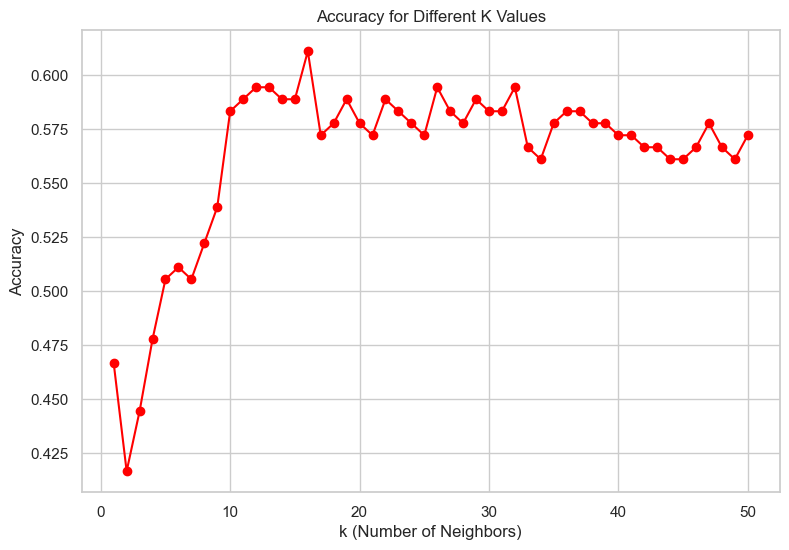

Best k value based on accuracy is: 16


In [31]:
plt.figure(figsize=(9, 6))
plt.plot(k_range, accuracy, marker='o', linestyle='-', color='red')
plt.title('Accuracy for Different K Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
best_k = k_range[accuracy.index(max(accuracy))]
#print(f"The chosen number of clusters (K) is: {best_k}")
print("Best k value based on accuracy is: {}".format(best_k))

## Task 2.3 

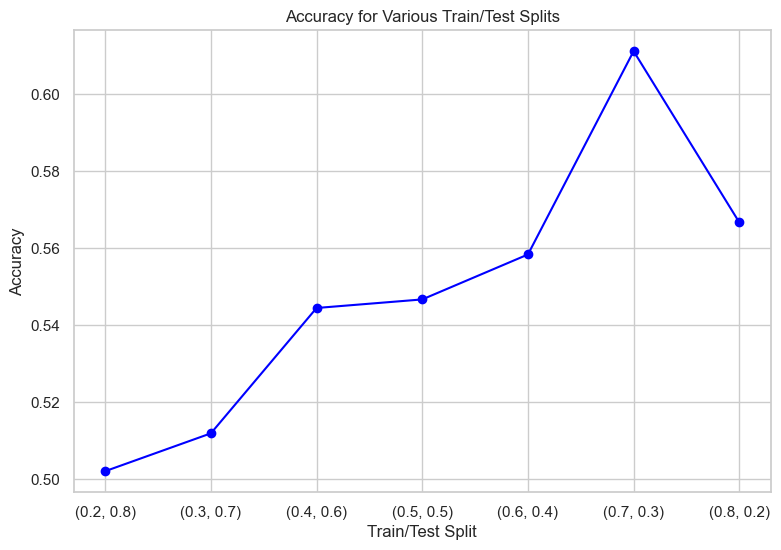

Best split based on highest accuracy is: (0.7, 0.3)


In [32]:
# Define different train/test splits
diff_split = [(0.2, 0.8), (0.3, 0.7), (0.4, 0.6), (0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
split_accuracy = []

# Iterate over different train/test splits
for train_size, test_size in diff_split:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_size, random_state=44)
    KNN = KNeighborsClassifier(n_neighbors=best_k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    split_accuracy.append(accuracy_score(y_test, y_pred))
    
# Plot the accuracy for different train/test splits
plt.figure(figsize=(9, 6))
plt.plot([str(diff_split) for diff_split in diff_split], split_accuracy, marker='o', linestyle='-', color='blue')
plt.title('Accuracy for Various Train/Test Splits')
plt.xlabel('Train/Test Split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the best split based on the highest accuracy
best_split = diff_split[split_accuracy.index(max(split_accuracy))]
print("Best split based on highest accuracy is: {}".format(best_split))

# Task 3: Clustering

## Task 3.1 

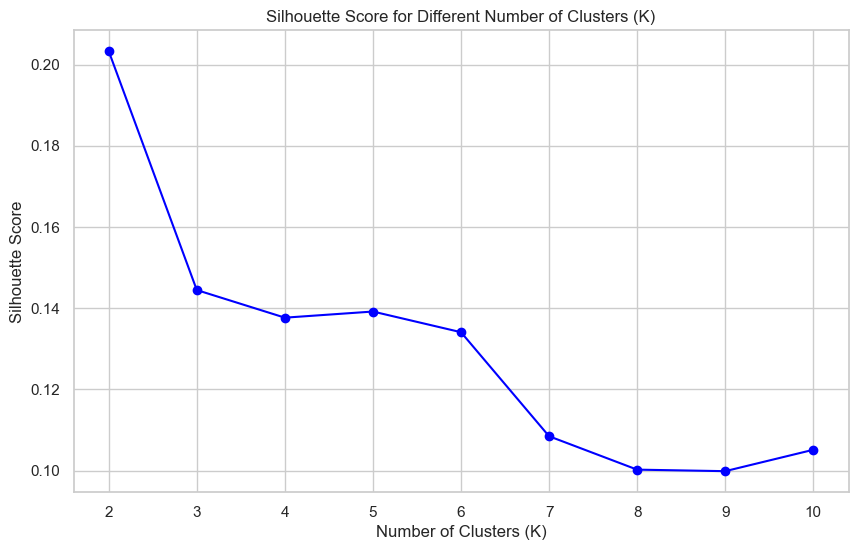

C:\Users\Pro HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette AvgScore is : 0.10510550585896741
The chosen number of clusters (K) is: 2


In [33]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for data preprocessing

# Load the random sample data
sample = pd.read_csv('A2RandomSample.csv')

# Drop the 'quality' column as it is non-numeric and it should not be used for clustering
X_data = sample.drop('quality', axis=1)

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

# Define a range of cluster numbers (K values)
k_range = range(2, 11)
silhouette_scores = []

# Iterate over different K values to find the best one
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=44, n_init='auto')
    cluster_label = kmeans.fit_predict(X_data)
    silhouette_avg = silhouette_score(X_data, cluster_label)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title('Silhouette Score for Different Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Task 3.1.2: Select the best K value based on the silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]

# Build the final K-Means model with the best K value
final_kmeans = KMeans(n_clusters=best_k, random_state=44)
final_cluster = final_kmeans.fit_predict(X_data)

# Print the chosen number of clusters
print("Silhouette AvgScore is : {}".format(silhouette_avg))
print("The chosen number of clusters (K) is: {}".format(best_k))


## Task 3.2 

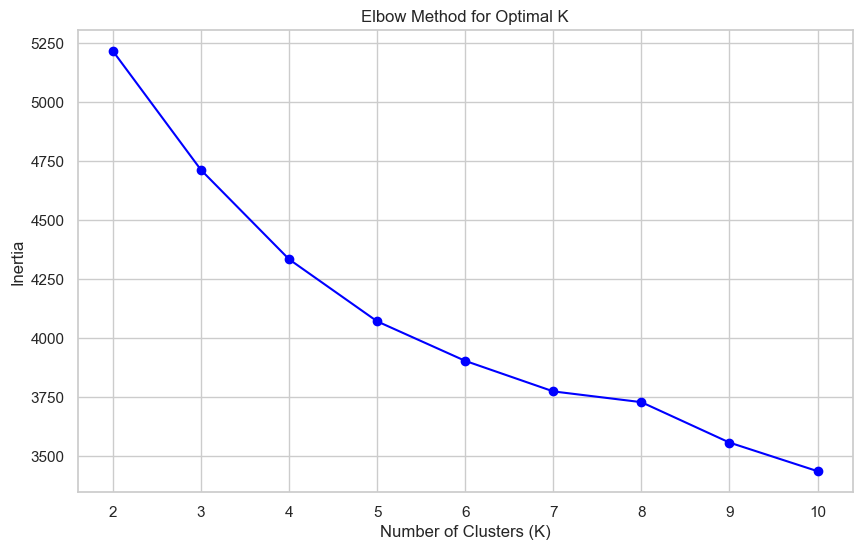

The best K value using the Elbow Method is: 2


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Task 3.2: Determine the optimal number of clusters (K) using the Elbow Method
inertia_values = []
k_values = list(range(2, 11))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=44, n_init='auto')
    kmeans.fit(X_data)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Find the best K value based on the Elbow Method
best_k_elbow = np.argmin(np.diff(inertia_values)) + 2  # +2 because the range starts from 2
print("The best K value using the Elbow Method is: {}".format(best_k_elbow))

## Task 3.3 

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sample = pd.read_csv('A2RandomSample.csv')
X = sample.iloc[:, 1:]

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=44, n_init='auto')
kmeans.fit(X)
cluster_labels = kmeans.predict(X)
true_quality_levels = sample['quality']

# Creating a confusion matrix
confusion = confusion_matrix(true_quality_levels, cluster_labels)

# Printing the confusion matrix
print("confusion matrix:")
print(confusion)

confusion matrix:
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 17   9   0   0   0   0   0]
 [ 88  90   0   0   0   0   0]
 [155 115   0   0   0   0   0]
 [ 85  20   0   0   0   0   0]
 [ 14   7   0   0   0   0   0]]
